In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from pyha import *
from pyha.cores import *
from pyha.cores.util import *
import scipy
from scipy import signal
import warnings
warnings.filterwarnings('ignore') # yolo!
import numpy as np
import inspect

# GitHub cannot display the Table of Contents!

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Info

In [3]:
print(inspect.getdoc(FFTPower))
print('\n\nMain interface\n' + inspect.getdoc(FFTPower.main))

FFTPower
--------

Multiplies complex input by its conjugate: (a + bi)(a - bi) = a**2 + b**2
Results in a real number.


Main interface
Args:
    input (DataValid): type not restricted

Returns:
    DataValid: Lowest 36 bits from the result.
        Example: Input is 18 bits with format 0:-17, then output is 36 bits 1:-34


# Examples

INFO:sim:Tracing is enabled, running "MODEL" and "HARDWARE" simulations
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Running "HARDWARE" simulation...


100%|██████████| 1024/1024 [00:00<00:00, 42259.57it/s]

INFO:sim:Flushing the pipeline to collect 1024 valid samples (currently have 1023)
INFO:sim:Flush took 1 cycles.
INFO:sim:OK!
INFO:sim:Simulations completed!


<IPython.core.display.Javascript object>


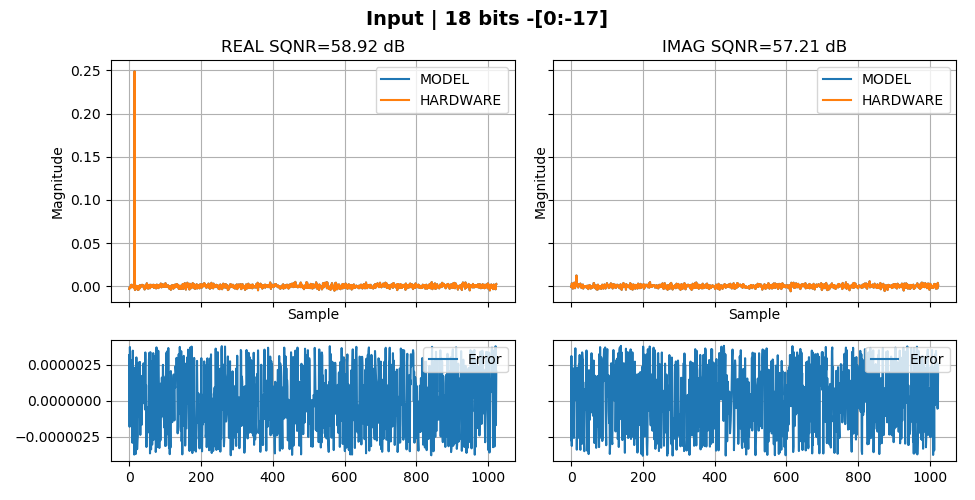

<IPython.core.display.Javascript object>


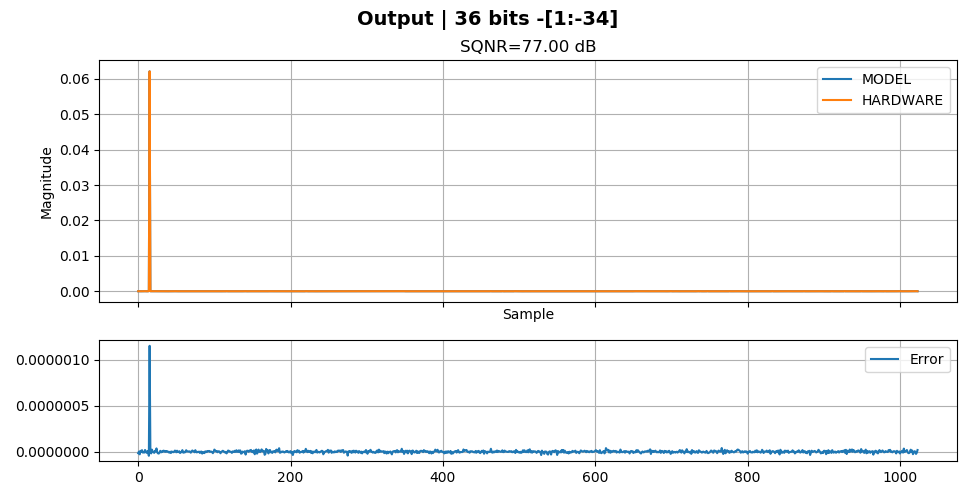

In [4]:
fft_size = 256
samples = 1024
freq = 15
sine = np.exp(2j*np.pi*np.linspace(0, 1, samples)*freq) * 0.25
noise = np.random.uniform(-1, 1, samples) + np.random.uniform(-1, 1, samples) * 1j
input_signal = sine + noise * 0.1
input_signal = np.fft.fft(input_signal) / len(input_signal)

dut = FFTPower()
sims = simulate(dut, input_signal, trace=True, pipeline_flush='auto') # run simulations and gather trace
plot_trace()

# Conversion to VHDL and RTL/NETLIST simulations

In [5]:
# Pyha supports running 'RTL' (using GHDL) and 'NETLIST' (netlist after quartus_map) level simulations.
output_dir = '~/Documents/pyha_output'
input_signal = np.random.normal(size=1024) * 0.25
dut = FFTPower()
sims = simulate(dut, input_signal, pipeline_flush='auto', 
                simulations=['MODEL', 'HARDWARE', 'RTL', 'NETLIST'], 
                conversion_path=output_dir)
assert hardware_sims_equal(sims)

INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Simulaton needs to support conversion to VHDL -> major slowdown
INFO:sim:Running "HARDWARE" simulation...


100%|██████████| 1024/1024 [00:00<00:00, 12455.79it/s]

INFO:sim:Flushing the pipeline to collect 1024 valid samples (currently have 1023)
INFO:sim:Flush took 1 cycles.
INFO:sim:OK!
INFO:conversion:Creating top.vhd ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:FFTPower to VHDL ...
INFO:conversion:Took 0.10 seconds
INFO:sim:Running "RTL" simulation...


loading VPI module '/cocotb/build/libs/x86_64/libvpi.so'
VPI module loaded!
100%|##########| 1025/1025 [00:00<00:00, 4486.75it/s]

INFO:sim:OK!
INFO:sim:Running "NETLIST" simulation...
INFO:synth:Running quartus_map quartus_project...
INFO:synth:Running quartus_eda quartus_project...
loading VPI module '/cocotb/build/libs/x86_64/libvpi.so'
VPI module loaded!
100%|##########| 1025/1025 [00:00<00:00, 2727.16it/s]

INFO:sim:OK!
INFO:sim:Simulations completed!
INFO:sim:Testing hardware simulations equality...
INFO:sim:sims_close(rtol=1e-16, atol=1e-16)
INFO:sim:Using "HARDWARE" as golden output
INFO:sim:HARDWARE OK!
INFO:sim:RTL OK!
INFO:sim:NETLIST OK!


# Synthesis:  resource usage and Fmax

In [6]:
quartus = get_simulator_quartus() # reuse the work that was done during the simulation
print(quartus.get_resource_usage('fit'))
print(quartus.get_fmax())

INFO:synth:Running quartus_fit quartus_project...
INFO:synth:Running quartus_sta -t script.tcl...


Family : Cyclone IV E
Device : EP4CE40F23C8
Timing Models : Final
Total logic elements : 38 / 39,600 ( < 1 % )
    Total combinational functions : 38 / 39,600 ( < 1 % )
    Dedicated logic registers : 37 / 39,600 ( < 1 % )
Total registers : 37
Total pins : 76 / 329 ( 23 % )
Total virtual pins : 0
Total memory bits : 0 / 1,161,216 ( 0 % )
Embedded Multiplier 9-bit elements : 4 / 232 ( 2 % )
Total PLLs : 0 / 4 ( 0 % )

+------------------------------------------------------------------------------------------------------------+
; Fmax Summary                                                                                               ;
+-------------+-----------------+------------+---------------------------------------------------------------+
; Fmax        ; Restricted Fmax ; Clock Name ; Note                                                          ;
+-------------+-----------------+------------+---------------------------------------------------------------+
; 1107.42 MHz ; 250.0 MH